### Определение перспективного тарифа для телеком компании

Цель: проанализировать поведение пользователей 2-х тарифов на небольшой выборке клиентов. Сделать вывод, какой тариф приносит компании больше денег.


### Вывод

- отвергли гипотезу о том, что средняя выручка от тарифов равна. Пользватели тарифа Ultra приносят больший доход, чем пользователи бюджетного тарифа Smart. 
- не смогли отвергнуть гипотезу о том, что выручка по пользователям из Москвы и регионов равна. Судя по всему, вне зависимости от места жительства, люди тратят примерно одинаковое количество денежных средств на связь.


### Ключевые понятия

Matplotlib, Python, NumPy, Pandas, SciPy, описательная статистика, проверка статистических гипотез.

### Описание тарифов

#### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

#### Обратим внимание:
«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### План выполнения проекта

1. [Откроем файлы с данными и изучим общую информацию](#step1)


2. [Подготовим данные](#step2)


- Приведём данные к нужным типам;
- Найдём и исправим ошибки в данных;
- Для каждого польователя посчитаем:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.


3. [Проанализируем данные](#step3)


Опишим поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 


4. [Проверим гипотезы](#step4)


- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


5. [Общий вывод](#step5)


#### Описание данных

Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

### Откроем файлы с данными и изучим общую информацию <a id="step1"></a>   

In [1]:
# импортируем библиотеку для отображения таблиц и другие библиотеки, которые потребуются нам для работы
import pandas as pd
from IPython.display import display
import math
import numpy as np
from scipy import stats as st

In [2]:
data_calls = pd.read_csv('/home/ilya/Desktop/Datasets/Telecom/calls.csv')
data_calls.info()
display(data_calls.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


В таблице нет пропусков, но в столбце "duration" - продолжительность звонков, присутствуют нулевые значения. Вероятно, это пропущенные звонки. Зная о том, что, например, в компании Мегафон в случае звонка клиенту другого оператора и срабатывания у последнего автоответчика, звонок тарифицируется, можно сделать вывод о том, что это такой же исходящий звонок. Во втором шаге посмотрим как много таких звонков.

Тип данных столбца "duration" вещественный. Принимая во внимание то, что оператор округляет все значения в большую сторону до целых минут, **необходимо привести данный столбец к целочисленным значениям. При этом учесть, что округление должно происходить не по математическим правилам, а в большую сторону.**

In [3]:
data_internet = pd.read_csv('/home/ilya/Desktop/Datasets/Telecom/internet.csv')

data_internet.info()
display(data_internet.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


В таблице нет пропусков и, на первый взгляд, нулевых значений. Столбец 	Unnamed: 0 не несёт в себе никакой смысловой нагрузки. Избавимся от него.

Тип данных столбца "mb_used" - объём потраченного интернет-трафика в МБ, вещественный. Принимая во внимание то, что оператор округляет все значения в большую сторону до целых мегабайт, **необходимо привести данный столбец к целочисленным значениям. При этом учесть, что округление должно происходить не по математическим правилам, а в большую сторону.**

In [4]:
data_messages = pd.read_csv('/home/ilya/Desktop/Datasets/Telecom/messages.csv')

data_messages.info()
display(data_messages.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


С этим датафреймом всё в порядке. Пропущенных значений нет, изменений типов данных не требуется.

In [5]:
data_tariffs = pd.read_csv('/home/ilya/Desktop/Datasets/Telecom/tariffs.csv')

data_tariffs.info()
display(data_tariffs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Все столбцы в этом датафрейме имеют целочисленных тип данных, кроме столбца с названием тарифа.

In [6]:
data_users = pd.read_csv('/home/ilya/Desktop/Datasets/Telecom/users.csv')

data_users.info()
display(data_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Всего у нас есть данные о 500 пользователях. В одном столбце, "churn_date" - дата прекращения пользования тарифом, заполнено только 38 строк. Это говорит о том, что у остальных 462 клиентов тариф ещё действовал на момент выгрузки данных, а 38 пользователей прекратили пользоваться тарифом.

### Предобработка данных <a id="step2"></a>   

In [7]:
# посмотрим как много нулевых значений в столбце "duration" датафрейма data_calls
data_calls[data_calls['duration']==0]

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Количество нулевых значений почти 20% датафрейма. Выше пришли к выводу, что это исходящие звонки на мобильные телефоны других операторов, у которых сработал автоответчик. Удалять мы их не будем, а заменим на 1, используя метод replace().

In [8]:
data_calls['duration'].replace(0, 1, inplace=True)

Изменим тип данных в столбце "duration" датафрейма data_calls и в столбце "mb_used" датафрейма data_internet. Так как метод astype(int) переводит значения в целые числе по правилам математического округления, в данном случае мы не можем им воспользоваться. 

In [9]:
# применив метод math.ceil() переведём вещественный тип данных в целочисленный
data_calls['duration'] = data_calls['duration'].apply(lambda x: math.ceil(x))
data_internet['mb_used'] = data_internet['mb_used'].apply(lambda x: math.ceil(x))

In [10]:
# убедимся что замена прошла успешно
data_calls.info()
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         202607 non-null  object
 1   call_date  202607 non-null  object
 2   duration   202607 non-null  int64 
 3   user_id    202607 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    149396 non-null  int64 
 1   id            149396 non-null  object
 2   mb_used       149396 non-null  int64 
 3   session_date  149396 non-null  object
 4   user_id       149396 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.7+ MB


In [11]:
# удалим столбец "Unnamed: 0" из таблицы "data_internet".
data_internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

Для того, чтобы получить дополнительную информацию по каждому пользователю, добавим в каждую таблицу (кроме той, в которой содержится информация по тарифам) столбец месяц. Затем объединим таблицы методом merge() по user_id и month и, наконец, воспользуемся сводными таблицами. 

In [12]:
# в каждой из этих таблиц есть столбец с одним и тем же названием "id", но информация в этих столбцах разная. 
# чтобы не запутаться после объединения таблиц, переименуем его
data_calls.rename(columns={'id': 'id_call'}, inplace=True)
data_internet.rename(columns={'id': 'id_internet'}, inplace=True)
data_messages.rename(columns={'id': 'id_messages'}, inplace=True)
# чтобы не запутаться что такое duratin переименуем столбец в call_duration
data_calls.rename(columns={'duration': 'call_duration'}, inplace=True)
# для дальнейшего объединения таблиц приведем столбцы с наименованием тарифа к общему виду
data_users.rename(columns={'tariff': 'tariff_name'}, inplace=True)

In [13]:
# проверим, успешно ли прошла замена
data_calls.info()
data_internet.info()
data_messages.info()
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_call        202607 non-null  object
 1   call_date      202607 non-null  object
 2   call_duration  202607 non-null  int64 
 3   user_id        202607 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_internet   149396 non-null  object
 1   mb_used       149396 non-null  int64 
 2   session_date  149396 non-null  object
 3   user_id       149396 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  

In [14]:
# добавим в таблицу data_calls столбец "month"
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

In [15]:
# добавим в таблицу data_internet столбец "month"
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [16]:
# добавим в таблицу data_messages столбец "month"
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

Сгруппируем таблицы

In [17]:
calls_month = (data_calls.groupby(['user_id', 'month'])[['id_call', 'call_duration']]
                          .agg({'id_call': 'count', 'call_duration': 'sum'})
                          .reset_index()
              )
calls_month.columns=['user_id', 'month', 'calls_amount', 'calls_duration']
calls_month.head(10)

,user_id,month,calls_amount,calls_duration
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478
5,1000,10,57,363
6,1000,11,43,344
7,1000,12,46,341
8,1001,11,59,444
9,1001,12,63,430


In [18]:
internet_month = (data_internet.groupby(['user_id', 'month'])[['id_internet', 'mb_used']]
                          .agg({'id_internet': 'count', 'mb_used': 'sum'})
                          .reset_index()
              )
internet_month.columns=['user_id', 'month', 'internet_amount', 'mb_used']
internet_month.head(10)

,user_id,month,internet_amount,mb_used
0,1000,5,5,2256
1,1000,6,49,23257
2,1000,7,29,14016
3,1000,8,29,14070
4,1000,9,27,14581
5,1000,10,27,14717
6,1000,11,24,14768
7,1000,12,21,9827
8,1001,11,55,18452
9,1001,12,41,14053


In [19]:
messages_month = data_messages.groupby(['user_id', 'month']).agg({'id_messages': 'count'}).reset_index()
messages_month.columns=['user_id', 'month', 'message_amount']
messages_month.head(10)

,user_id,month,message_amount
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [20]:
# приступим к объединению таблиц
# в таблице calls_month 3174 строк, в таблице internet_month 3203 строк. 
# На выходе должно получиться не больше одного из значений
calls_internet = calls_month.merge(internet_month, on=['user_id','month'], how='left')
calls_internet

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used
0,1000,5,22,164,5.0,2256.0
1,1000,6,43,187,49.0,23257.0
2,1000,7,47,346,29.0,14016.0
3,1000,8,52,418,29.0,14070.0
4,1000,9,58,478,27.0,14581.0
...,...,...,...,...,...,...
3169,1498,10,41,258,59.0,20604.0
3170,1499,9,9,71,5.0,1848.0
3171,1499,10,68,473,58.0,17809.0
3172,1499,11,74,624,49.0,17984.0


In [21]:
# в таблице calls_internet_message 3174 строк, в таблице messages_month 2717 строк. 
# На выходе должно получиться не больше одного из значений
calls_internet_message = calls_internet.merge(messages_month, on=['user_id','month'], how='left')
calls_internet_message

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used,message_amount
0,1000,5,22,164,5.0,2256.0,22.0
1,1000,6,43,187,49.0,23257.0,60.0
2,1000,7,47,346,29.0,14016.0,75.0
3,1000,8,52,418,29.0,14070.0,81.0
4,1000,9,58,478,27.0,14581.0,57.0
...,...,...,...,...,...,...,...
3169,1498,10,41,258,59.0,20604.0,42.0
3170,1499,9,9,71,5.0,1848.0,11.0
3171,1499,10,68,473,58.0,17809.0,48.0
3172,1499,11,74,624,49.0,17984.0,59.0


In [22]:
# из датафрейма о пользвателях, нам нужна только информация о тарифе и городе. Поэтому добавим только эти столбцы
calls_internet_message_trf = calls_internet_message.merge(data_users[['user_id', 'tariff_name', 'city']], 
                                                          on=['user_id'], how='left')
calls_internet_message_trf

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used,message_amount,tariff_name,city
0,1000,5,22,164,5.0,2256.0,22.0,ultra,Краснодар
1,1000,6,43,187,49.0,23257.0,60.0,ultra,Краснодар
2,1000,7,47,346,29.0,14016.0,75.0,ultra,Краснодар
3,1000,8,52,418,29.0,14070.0,81.0,ultra,Краснодар
4,1000,9,58,478,27.0,14581.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...
3169,1498,10,41,258,59.0,20604.0,42.0,smart,Владикавказ
3170,1499,9,9,71,5.0,1848.0,11.0,smart,Пермь
3171,1499,10,68,473,58.0,17809.0,48.0,smart,Пермь
3172,1499,11,74,624,49.0,17984.0,59.0,smart,Пермь


In [23]:
full_data = calls_internet_message_trf.merge(data_tariffs, on='tariff_name', how='left')
full_data.head(10)

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used,message_amount,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,164,5.0,2256.0,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,43,187,49.0,23257.0,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,47,346,29.0,14016.0,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,52,418,29.0,14070.0,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,58,478,27.0,14581.0,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,10,57,363,27.0,14717.0,73.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,11,43,344,24.0,14768.0,58.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,12,46,341,21.0,9827.0,70.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1001,11,59,444,55.0,18452.0,NaN,smart,Москва,50,15360,500,550,200,3,3
9,1001,12,63,430,41.0,14053.0,NaN,smart,Москва,50,15360,500,550,200,3,3


Добавим в таблицу 3 столбца, в которых будут отображаться звонки, сообщения и интернет сверх тарифного лимита.

In [24]:
def over_limit_minutes(row):
    if (row['calls_duration'] - row['minutes_included']) > 0:
        return (row['calls_duration'] - row['minutes_included'])
    else:
        return 0
    
full_data['over_limit_minutes'] = full_data.apply(over_limit_minutes, axis=1)

In [25]:
def over_limit_mb(row):
    if (row['mb_used'] - row['mb_per_month_included']) > 0:
        return (row['mb_used'] - row['mb_per_month_included'])
    else:
        return 0
    
full_data['over_limit_gb'] = (full_data.apply(over_limit_mb, axis=1) / 1024).apply(np.ceil)

In [26]:
def over_limit_messages(row):
    if (row['message_amount'] - row['messages_included']) > 0:
        return (row['message_amount'] - row['messages_included'])
    else:
        return 0
    
full_data['over_limit_messages'] = full_data.apply(over_limit_messages, axis=1)

In [27]:
full_data.head(10)

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used,message_amount,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_limit_minutes,over_limit_gb,over_limit_messages
0,1000,5,22,164,5.0,2256.0,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
1,1000,6,43,187,49.0,23257.0,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
2,1000,7,47,346,29.0,14016.0,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
3,1000,8,52,418,29.0,14070.0,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
4,1000,9,58,478,27.0,14581.0,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
5,1000,10,57,363,27.0,14717.0,73.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
6,1000,11,43,344,24.0,14768.0,58.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
7,1000,12,46,341,21.0,9827.0,70.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0
8,1001,11,59,444,55.0,18452.0,NaN,smart,Москва,50,15360,500,550,200,3,3,0,4.0,0.0
9,1001,12,63,430,41.0,14053.0,NaN,smart,Москва,50,15360,500,550,200,3,3,0,0.0,0.0


Теперь подсчитаем доходы с каждого пользователя по месяцам.

In [28]:
def make_revenue(row):
    revenue = row['rub_monthly_fee'] +\
    row['over_limit_minutes'] * row['rub_per_minute'] +\
    row['over_limit_gb'] * row['rub_per_gb'] +\
    row['over_limit_messages'] * row['rub_per_message']
    return revenue
full_data['revenue'] = full_data.apply(make_revenue, axis=1)

In [29]:
full_data.head(10)

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used,message_amount,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_limit_minutes,over_limit_gb,over_limit_messages,revenue
0,1000,5,22,164,5.0,2256.0,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
1,1000,6,43,187,49.0,23257.0,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
2,1000,7,47,346,29.0,14016.0,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
3,1000,8,52,418,29.0,14070.0,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
4,1000,9,58,478,27.0,14581.0,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
5,1000,10,57,363,27.0,14717.0,73.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
6,1000,11,43,344,24.0,14768.0,58.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
7,1000,12,46,341,21.0,9827.0,70.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
8,1001,11,59,444,55.0,18452.0,NaN,smart,Москва,50,15360,500,550,200,3,3,0,4.0,0.0,1350.0
9,1001,12,63,430,41.0,14053.0,NaN,smart,Москва,50,15360,500,550,200,3,3,0,0.0,0.0,550.0


### Анализ данных <a id="step3"></a>   

Из объединной таблицы выведем 2 таблицы, в зависимости от тарифа.

In [30]:
smart = full_data[full_data['tariff_name']=='smart']
ultra = full_data[full_data['tariff_name']=='ultra']

In [31]:
# посчитаем сколько минут разговора, смс, трафика требуется пользователям тарифа смарт в среднем в каждом месяце
smart_pivot = smart.pivot_table(index='month', values=['calls_duration', 'message_amount', 'mb_used', 'revenue'], 
                                aggfunc='mean')
smart_pivot.head(12)

,calls_duration,mb_used,message_amount,revenue
month,,,,
1,209.647059,8524.441176,20.000000,723.352941
2,306.310345,11611.396552,27.940000,835.051724
3,400.532468,15123.857143,35.550725,1178.571429
4,377.000000,13479.482143,35.864583,974.875000
5,398.404255,15825.198582,39.032787,1217.687943
6,409.196319,15835.368098,38.510638,1227.055215
7,419.288557,15763.512438,38.988506,1245.477612
8,435.042735,16727.446352,38.857143,1349.525641
9,441.779923,16321.023166,39.252252,1274.208494


In [32]:
# посчитаем сколько минут разговора, смс, трафика требуется пользователям тарифа ультра в среднем в каждом месяце
ultra_pivot = ultra.pivot_table(index='month', values=['calls_duration', 'message_amount', 'mb_used', 'revenue'], 
                                aggfunc='mean')
ultra_pivot.head(12)

,calls_duration,mb_used,message_amount,revenue
month,,,,
1,440.888889,13153.555556,43.428571,1950.000000
2,304.666667,12858.500000,32.937500,1975.000000
3,503.081081,17551.972973,47.800000,2014.864865
4,487.811321,17414.207547,45.447368,2003.773585
5,549.468750,20005.825397,49.448980,2067.187500
6,510.666667,19162.712500,50.687500,2044.444444
7,579.397727,20701.241379,60.942857,2127.272727
8,544.941748,19802.196078,58.690476,2085.436893
9,573.594595,19286.027273,63.197802,2022.972973


In [33]:
# для автоматизации расчёта дисперсии по тарифу Smart напишем функцию
list = ('calls_duration', 'mb_used', 'message_amount', 'revenue')

print('Дисперсия метрик по тарифу Smart:')

for x in list:
    variance_smart = np.var(smart_pivot[x])
    print(x, '=', variance_smart)

Дисперсия метрик по тарифу Smart:
calls_duration = 5129.354951501331
mb_used = 6583156.607769791
message_amount = 35.71297445216057
revenue = 55918.99624507005


In [34]:
# для автоматизации расчёта дисперсии по тарифу Ultra напишем функцию
list = ('calls_duration', 'mb_used', 'message_amount', 'revenue')

print('Дисперсия метрик по тарифу Ultra:')

for x in list:
    variance_ultra = np.var(ultra_pivot[x])
    print(x, '=', variance_ultra)

Дисперсия метрик по тарифу Ultra:
calls_duration = 6947.079465867694
mb_used = 7383119.892593172
message_amount = 135.00362952527308
revenue = 3044.719286383472


In [35]:
# для автоматизации расчёта стандартного отклонения по тарифу Smart напишем функцию
list = ('calls_duration', 'mb_used', 'message_amount', 'revenue')

print('Стандартное отклонение метрик по тарифу Smart:')

for x in list:
    std_smart = np.std(smart_pivot[x], ddof=1)
    print(x, '=', std_smart)

Стандартное отклонение метрик по тарифу Smart:
calls_duration = 74.80414391657966
mb_used = 2679.8554793671838
message_amount = 6.241763251939798
revenue = 246.9869254803951


In [36]:
# для автоматизации расчёта стандартного отклонения по тарифу Ultra напишем функцию
list = ('calls_duration', 'mb_used', 'message_amount', 'revenue')

print('Стандартное отклонение метрик по тарифу Ultra:')

for x in list:
    std_ultra = np.std(ultra_pivot[x], ddof=1) # так как мы работаем с выборкой
    print(x, '=', std_ultra)

Стандартное отклонение метрик по тарифу Ultra:
calls_duration = 87.05533955239586
mb_used = 2838.0120877300087
message_amount = 12.135760658271213
revenue = 57.632559797235885


Построим сравнительные гистрограммы 2-х тарифов на основе полных данных по 4-м метрикам: звонки, интернет, SMS сообщения и доход.

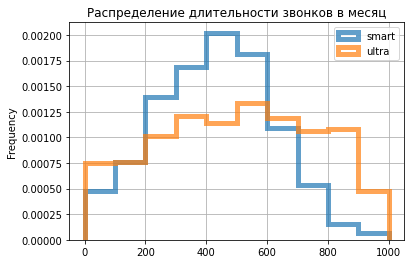

In [37]:
ax = smart.plot(kind='hist', y='calls_duration', histtype='step', range=(0, 1000), bins=10, linewidth=5, alpha=0.7, 
                label='smart', density=True, title='Распределение длительности звонков в месяц');
ultra.plot(kind='hist', y='calls_duration', histtype='step', range=(0, 1000), bins=10, linewidth=5, alpha=0.7, 
           label='ultra', ax=ax, grid=True, legend=True, density=True);

Глядя на гистограмму, можно сделать вывод, что длительность звонков тарифа смарт в большинстве своём составляет от 400 до 600 минут в месяц (в тариф включены 500 минут). Далее мы видим нормальное распределение в форме колокола. У тарифа ультра распределение более пологое: примерно одик=наковое количество звонков длительностью от 200 до 900 минут (в тариф включены 3000 минут). То есть большинство пользователей тарифа смарт не перерасходуют лимит звонков, а значит не несут дополнительных расходов по этой метрике.

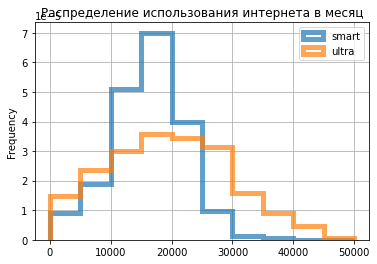

In [38]:
ax = smart.plot(kind='hist', y='mb_used', histtype='step', range=(0, 50000), bins=10, linewidth=5, alpha=0.7, 
                label='smart', density=True, title='Распределение использования интернета в месяц');
ultra.plot(kind='hist', y='mb_used', histtype='step', range=(0, 50000), bins=10, linewidth=5, alpha=0.7, 
           label='ultra', ax=ax, grid=True, legend=True, density=True);

Аналогичная картина наблюдается и для интернета. Большинство пользователей тарифа смарт укладывается в отведенные 15360 МБ. Распределение по тарифу Ультра опять более пологое. Большинство пользователей в месяц тратят от 10000 до 30000 МБ.

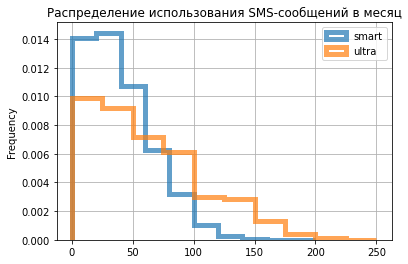

In [39]:
ax = smart.plot(kind='hist', y='message_amount', histtype='step', range=(0, 200), bins=10, linewidth=5, alpha=0.7, 
                label='smart', density=True, title='Распределение использования SMS-сообщений в месяц');
ultra.plot(kind='hist', y='message_amount', histtype='step', range=(0, 250), bins=10, linewidth=5, alpha=0.7, 
           label='ultra', ax=ax, grid=True, legend=True, density=True);

Пользователям тарифа Смарт включено 50 бесплатных SMS сообщений. Подавляющее большинство укладывается в эти лимиты. Оба графика скошены вправо, что свидетельсвует о "хвосте" больших значений.

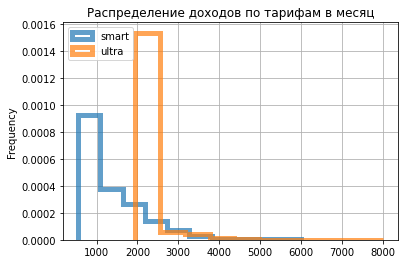

In [40]:
ax = smart.plot(kind='hist', y='revenue', histtype='step', range=(550, 6000), bins=10, linewidth=5, alpha=0.7, 
                label='smart', density=True, title='Распределение доходов по тарифам в месяц');
ultra.plot(kind='hist', y='revenue', histtype='step', range=(1950, 8000), bins=10, linewidth=5, alpha=0.7, 
           label='ultra', ax=ax, grid=True, legend=True, density=True);

Доходы по тарифу Ультра существенно выше. Это определяется абонентской платой, которая в 3,5 раза выше, чем плата по тарифу Смарт. Большинство доходов по бюджетному тарифу находится в диапазоне от 550 до 1000 рублей, в то время как по тарифу Ультра эта цифра от 2000 до 2500 руб.

### Проверка гипотез <a id="step4"></a>   

Начнём с формулировки нулевой гипотезы H₀. Она всегда формулируется так, чтобы использовать знак равенства. В нашем случае она будет звучать так: "средняя выручка по пользователям тарифов «Ультра» и «Смарт» равна". Исходя из H₀ сформулируем альтернативную гипотезу H₁, которая будет звучать так: "средняя выручка по пользователям тарифов «Ультра» и «Смарт» различается". 

Необходимо выбрать значение alpha. Чаще всего используют значения 0.05, 0.01, 0.005. Чем меньше значение, тем точнее результат. Остановимся на значении 0.05. Оно ограничивает частоту ошибок первого рода, то есть ошибки, когда мы отвергнули нулевую гипотезу, а она была верна. В случае, если значение 0.05, то вероятность отвергуть нулевую гипотезу, когда она была верна =  5/100 = 1/20

В данном случае нам необходимо сопоставить среднее двух генеральных совокупностей.
Без проведения корректного теста нельзя считать отличия случайными или разницу достаточной, чтобы полагать суммы разными.
Вместо расчёта и сравнения самих средних, используем эти датасеты для проведения статистического теста.
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2).

In [41]:
revenue_smart = smart['revenue']

revenue_ultra = ultra['revenue']

alpha = .05 

results = st.ttest_ind(
    revenue_smart, 
    revenue_ultra) # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3096507569416545e-144
Отвергаем нулевую гипотезу


В данном случае мы отвергаем нулевую гипотезу, которая звучит как "средняя выручка по пользователям тарифов «Ультра» и «Смарт» равна". Сооветственно, мы не можем отвергнуть альтернативную гипотезу о том что "средняя выручка по пользователям тарифов «Ультра» и «Смарт» различается".

На двух гистограммах мы видим пики значений на уровнях минимальной абонентской платы. Оба графика скошены вправо, что свидетельствует о "хвосте" из больших значений. Из графиков видно, что выручка по тарифу Ultra выше, также в пользу этого говорит и альтернативная теория.

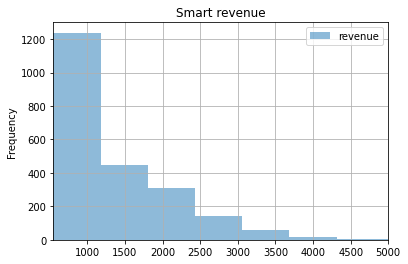

In [42]:
smart.plot(kind='hist', y='revenue', title='Smart revenue', bins=10, grid=True, alpha=0.5, xlim=(550, 5000));

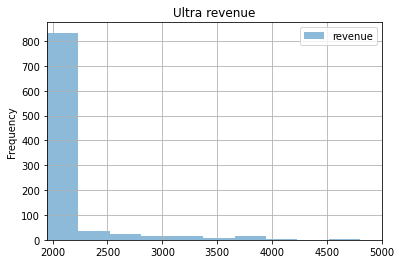

In [43]:
ultra.plot(kind='hist', y='revenue', title='Ultra revenue', bins=10, grid=True, alpha=0.5, xlim=(1950, 5000));

Начнём с формулировки нулевой гипотезы H₀. Она всегда формулируется так, чтобы использовать знак равенства. В нашем случае она будет звучать так: "средняя выручка по пользователям из Москвы равна выручке пользователей из других регионов". Исходя из H₀ сформулируем альтернативную гипотезу H₁, которая будет звучать так: "средняя выручка по пользователям из Москвы отличается от выручки пользователей из других регионов". Также мы видим, что пользователей более дешевого тарифа смарт примерно на 1/3 больше.

In [44]:
# выведем 2 таблицы, в зависимости от места проживания пользователей
moscow_stat = full_data[full_data['city']=='Москва']
region_stat = full_data[full_data['city']!='Москва']

In [45]:
moscow_stat.head(10)

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used,message_amount,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_limit_minutes,over_limit_gb,over_limit_messages,revenue
8,1001,11,59,444,55.0,18452.0,NaN,smart,Москва,50,15360,500,550,200,3,3,0,4.0,0.0,1350.0
9,1001,12,63,430,41.0,14053.0,NaN,smart,Москва,50,15360,500,550,200,3,3,0,0.0,0.0,550.0
17,1003,8,55,392,15.0,8571.0,37.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
18,1003,9,134,990,22.0,12479.0,91.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
19,1003,10,108,866,25.0,14779.0,83.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
20,1003,11,115,844,21.0,11368.0,94.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
21,1003,12,108,822,21.0,10132.0,75.0,ultra,Москва,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
53,1007,4,25,202,21.0,8031.0,11.0,smart,Москва,50,15360,500,550,200,3,3,0,0.0,0.0,550.0
54,1007,5,67,490,60.0,17708.0,39.0,smart,Москва,50,15360,500,550,200,3,3,0,3.0,0.0,1150.0
55,1007,6,68,558,44.0,13674.0,26.0,smart,Москва,50,15360,500,550,200,3,3,58,0.0,0.0,724.0


In [46]:
region_stat.head(10)

,user_id,month,calls_amount,calls_duration,internet_amount,mb_used,message_amount,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_limit_minutes,over_limit_gb,over_limit_messages,revenue
0,1000,5,22,164,5.0,2256.0,22.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
1,1000,6,43,187,49.0,23257.0,60.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
2,1000,7,47,346,29.0,14016.0,75.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
3,1000,8,52,418,29.0,14070.0,81.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
4,1000,9,58,478,27.0,14581.0,57.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
5,1000,10,57,363,27.0,14717.0,73.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
6,1000,11,43,344,24.0,14768.0,58.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
7,1000,12,46,341,21.0,9827.0,70.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0,0.0,0.0,1950.0
10,1002,6,15,118,34.0,10871.0,4.0,smart,Стерлитамак,50,15360,500,550,200,3,3,0,0.0,0.0,550.0
11,1002,7,26,219,58.0,17601.0,11.0,smart,Стерлитамак,50,15360,500,550,200,3,3,0,3.0,0.0,1150.0


Средний доход по Москве равен 1560 руб., а по регионам — 1535 руб. Значима ли разница между этими числами зависит от дисперсии выборок, по которым рассчитаны значения. Вместо расчёта и сравнения самих средних, используем эти датасеты для проведения статистического теста.

In [47]:
# посчитаем среднее арифметическое столбцов revenue
print(moscow_stat['revenue'].mean())
print(region_stat['revenue'].mean())

1559.927868852459
1535.3876755070203


In [48]:
revenue_moscow = moscow_stat['revenue']

revenue_region = region_stat['revenue']

alpha = .05 

results = st.ttest_ind(
    revenue_moscow, 
    revenue_region) # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4986854643598172
Не получилось отвергнуть нулевую гипотезу


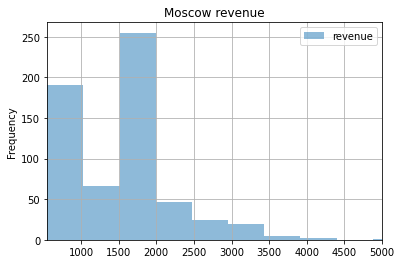

In [49]:
moscow_stat.plot(kind='hist', y='revenue', title='Moscow revenue', bins=10, grid=True, alpha=0.5, xlim=(550, 5000));

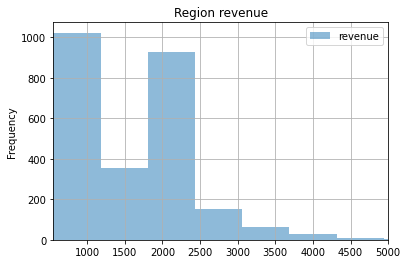

In [50]:
region_stat.plot(kind='hist', y='revenue', title='Region revenue', bins=10, grid=True, alpha=0.5, xlim=(550, 5000));

На одном и на другом графике мы видим 2 пика, которые соответствуют минимальной абонентской плате 2-х тарифов. Пользователей в регионах примерно в 5 раз больше чем в Москве. Графики говорят в пользу нулевой гипотезы.

### Общий вывод <a id="step5"></a>   

**Краткий обзор проведённой работы.** 
Провели предобработку данных, перевели нужные столбцы в целочисленные и округлили в большую сторону использование интернета и звонков (до целых чисел по правилам тарификации компании Мегалайн). Описали поведение пользователей разных тарифов.  

**Главные выводы.** 
Мы отвергли гипотезу о том, что средняя выручка от тарифов равна. Пользватели тарифа Ultra приносят ольший доход, чем пользователи бюджетного тарифа Smart. Собственно, дальше работа за маркетолагами, им нужно привлечь клиентов на более выгодный для компании Мегалайн, тариф Ultra.
Мы не смогли отвергнуть гипотезу о том, что выручка по пользователям из Москвы и регионов равна. Судя по всему, вне зависимости от места жительства, люди тратят примерно одинаковое количество денежных средств на связь.